In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#Load the dataset
fandango = pd.read_csv('fandango_scrape.csv')

In [45]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [46]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [47]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

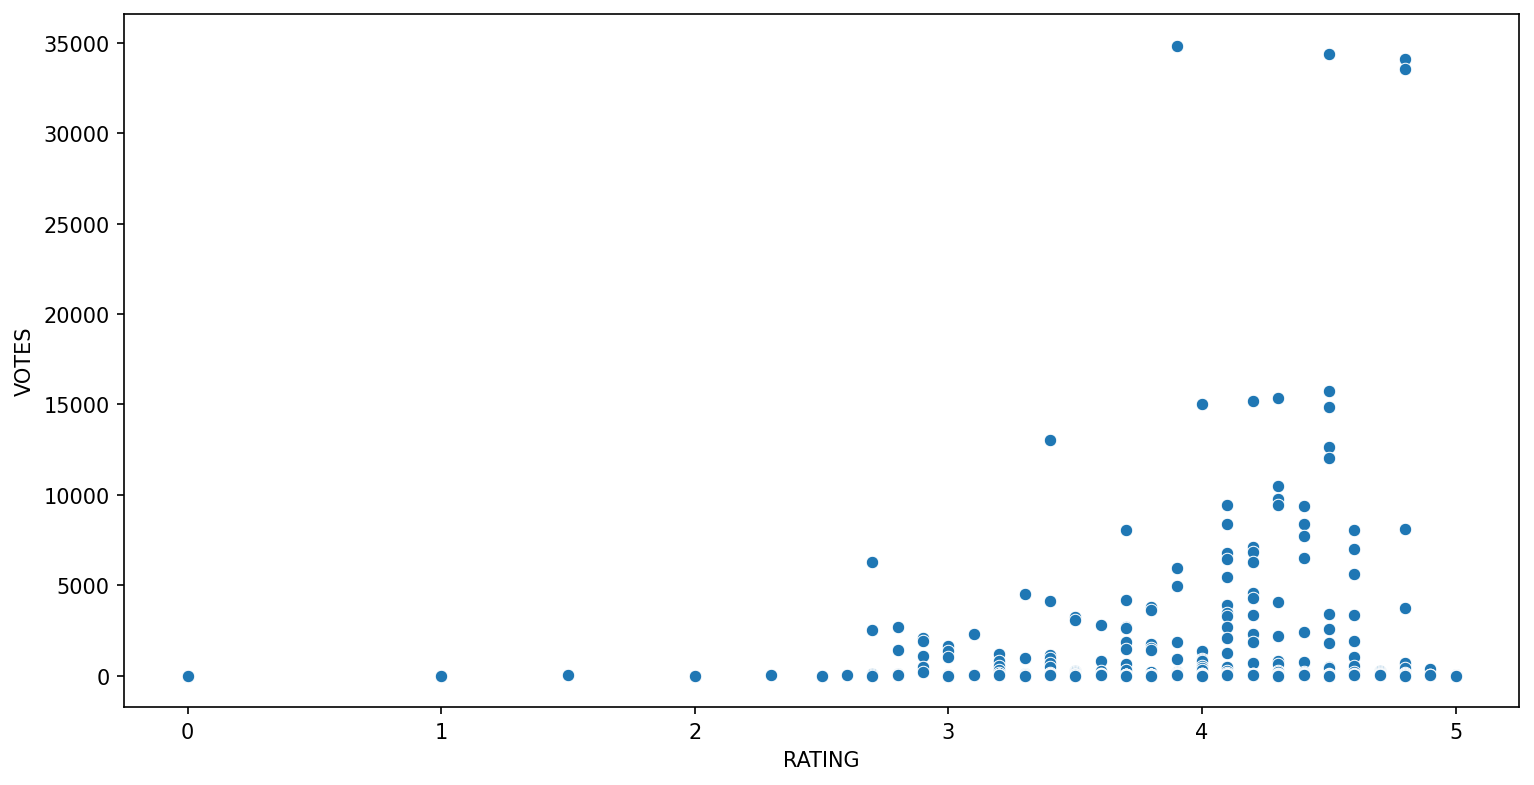

In [48]:
#Relationship between the popularity of the film and it's rating
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(data=fandango, y='VOTES', x= 'RATING')

In [49]:
numeric_columns = ['STARS', 'RATING', 'VOTES']
correlation_matrix = fandango[numeric_columns].corr()
correlation_matrix

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [50]:
#Crate a new column that is able to strip the year from the title and set the new column as Year
title = 'Film Title Name(Year)'

In [51]:
title.split('(')[-1].replace(')', '')

'Year'

In [52]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))

In [53]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [54]:
#To check how many movies are in the Fandango DataFrame per year
fandango['YEAR'].value_counts()


YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

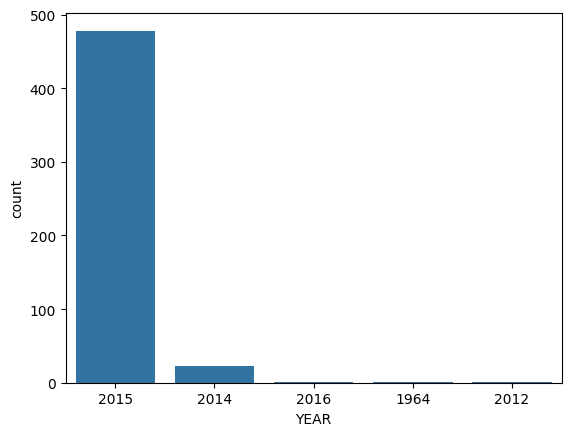

In [55]:
#Visualizt the count od movies per year with a plot
sns.countplot(data=fandango, x='YEAR')

In [56]:
#To chech What are the 10 movies with the highest number of votes
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [57]:
#To check how many movies have zero votes
no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

In [58]:
#Create DataFrame of only reviewed films by removing any films that have zero votes
fan_reviewed = fandango[fandango['VOTES'] > 0]

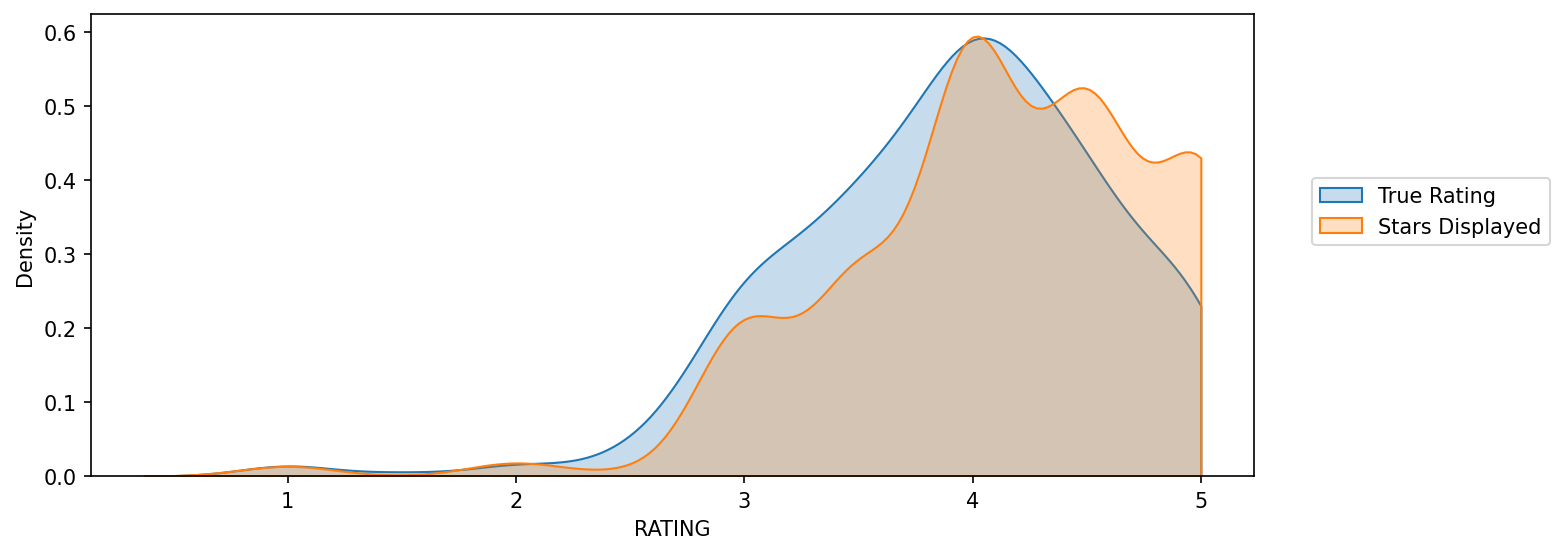

In [59]:
plt.figure(figsize=(10,4), dpi=150)
sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05, 0.5))

In [60]:
#Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. 
# Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.

fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\Noel\AppData\Local\Temp\ipykernel_21404\2318023510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
C:\Users\Noel\AppData\Local\Temp\ipykernel_21404\2318023510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [61]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


C:\Users\Noel\AppData\Local\Temp\ipykernel_21404\602285187.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fan_reviewed, x = 'STARS_DIFF', palette='magma')


<Axes: xlabel='STARS_DIFF', ylabel='count'>

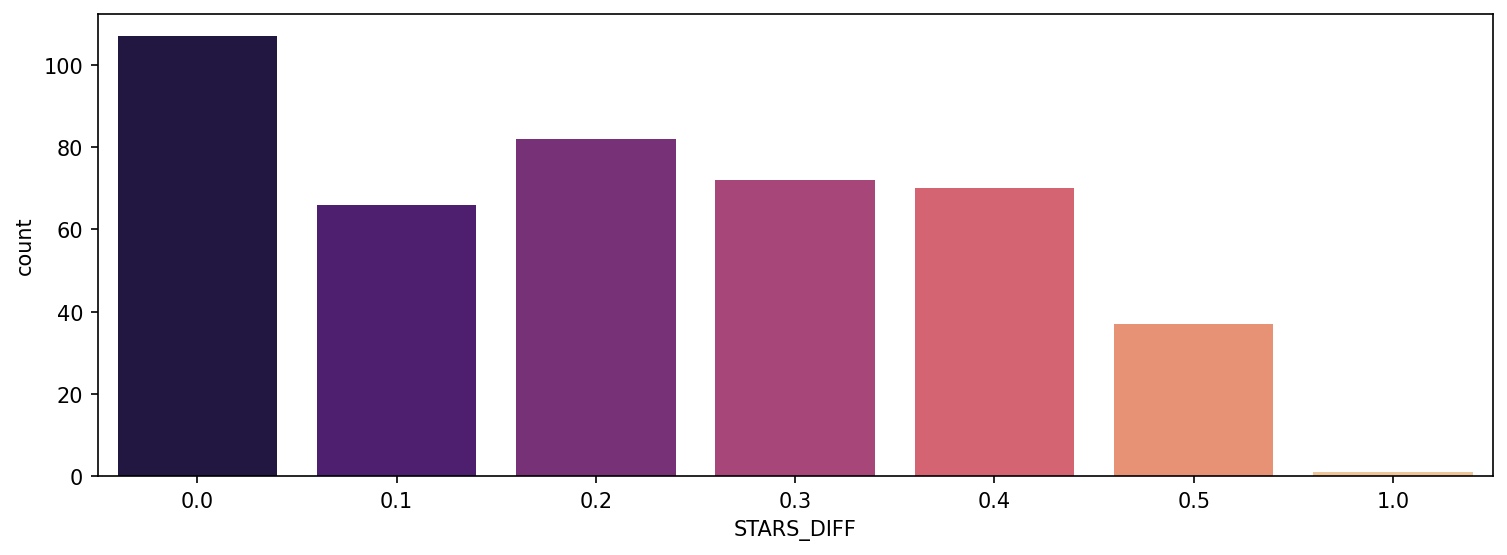

In [62]:
#Creating a count plot to display the number of times a certain difference occurs.

plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=fan_reviewed, x = 'STARS_DIFF', palette='magma')

In [63]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites


In [64]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [65]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [66]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [67]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

(0.0, 100.0)

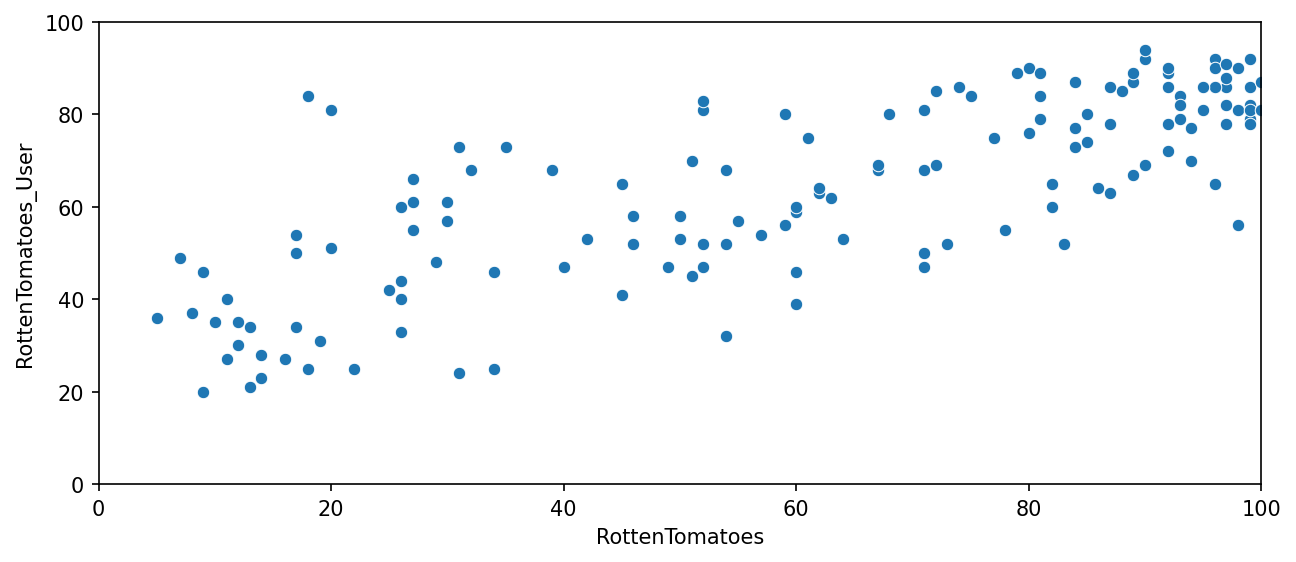

In [71]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y= 'RottenTomatoes_User')
plt.ylim(0, 100)
plt.xlim(0, 100)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. 
- Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_Use

In [72]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.

In [73]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Creating a Plot for the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

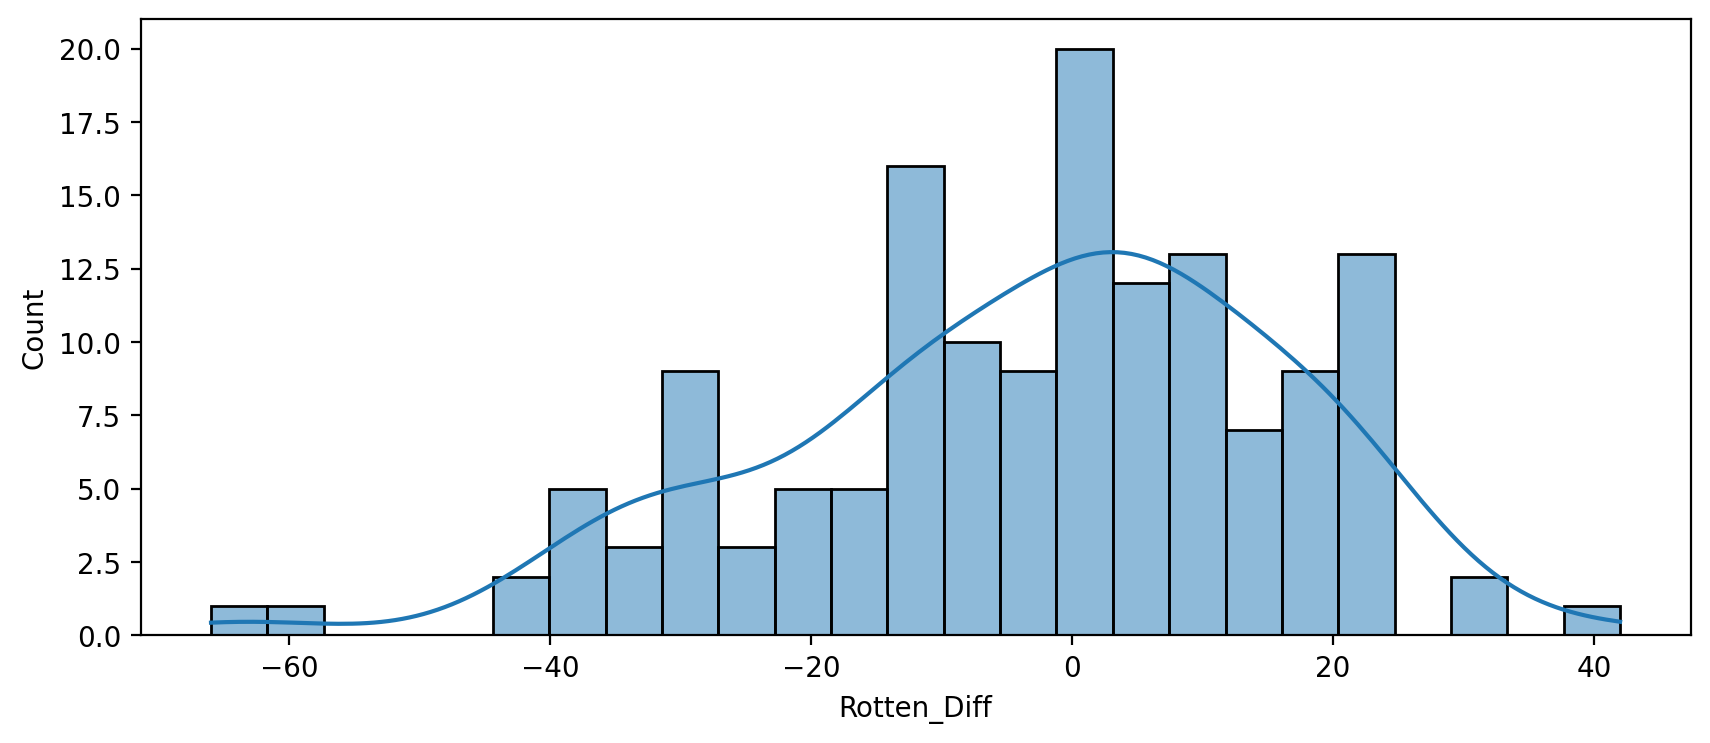

In [78]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and RT User Score')

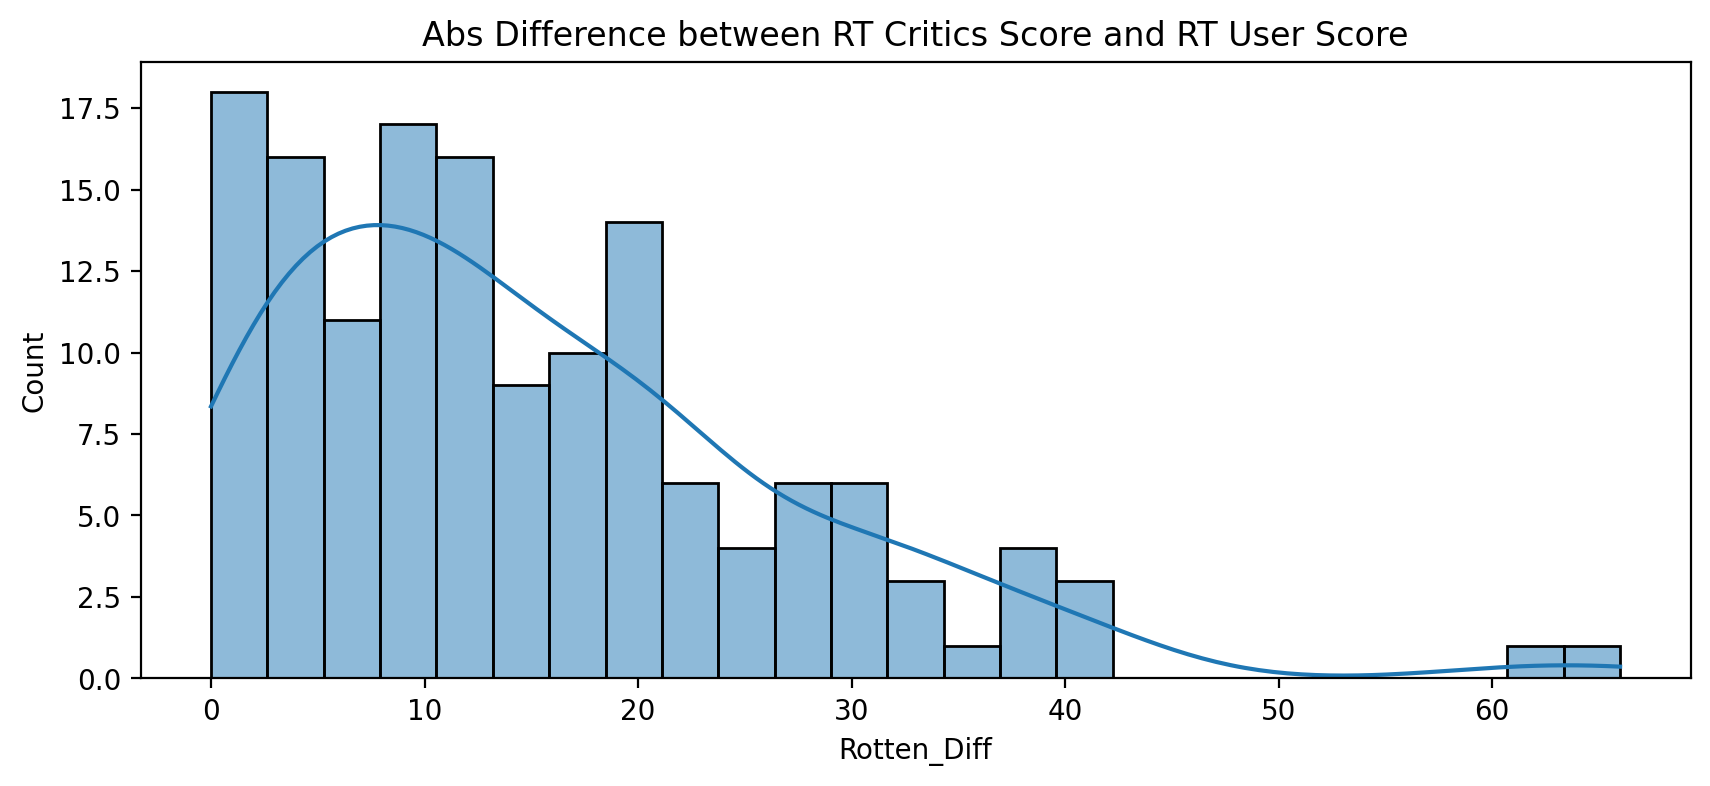

In [82]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot( x=all_sites['Rotten_Diff'].apply(abs), kde=True, bins=25)
plt.title("Abs Difference between RT Critics Score and RT User Score")

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

To check What are the top 5 movies users rated higher than critics on average

In [85]:
print("Users Love but Critics Hate")
all_sites.nsmallest(5, 'Rotten_Diff')['FILM']

Users Love but Critics Hate


3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

To check What are the top 5 movies users rated higer on average

In [87]:
print("Critics love, but Users Hate")
all_sites.nlargest(5, 'Rotten_Diff')['FILM']

Critics love, but Users Hate


69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

Display a scatterplot of the Metacritic Rating versus the Metacritic User rating

(0.0, 10.0)

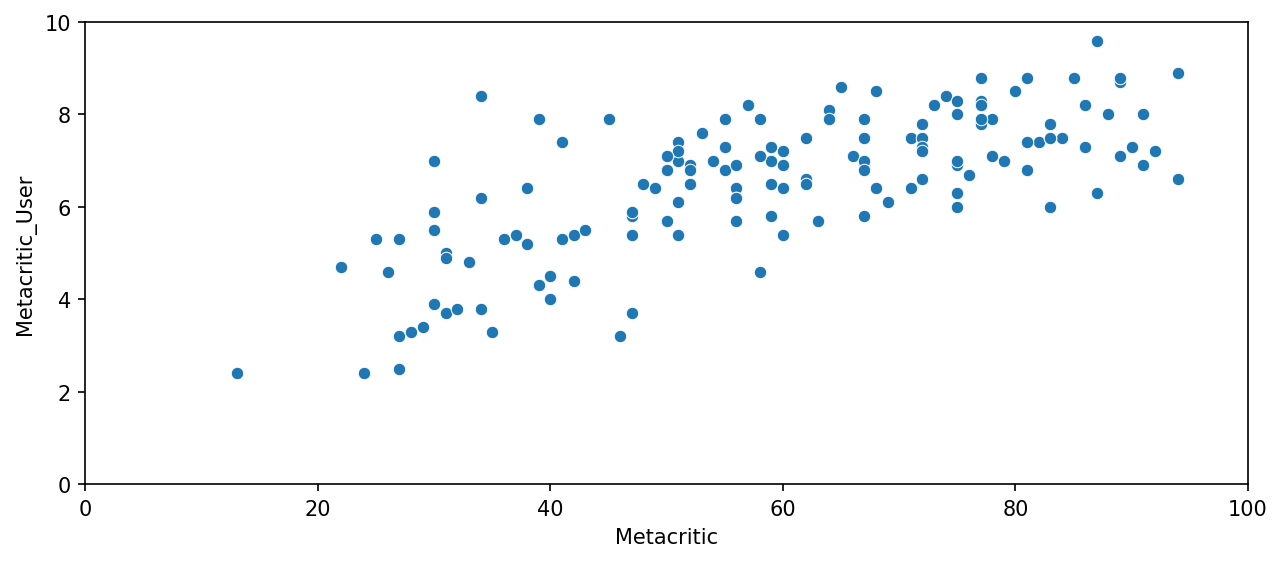

In [89]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

## IMBD

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

- Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

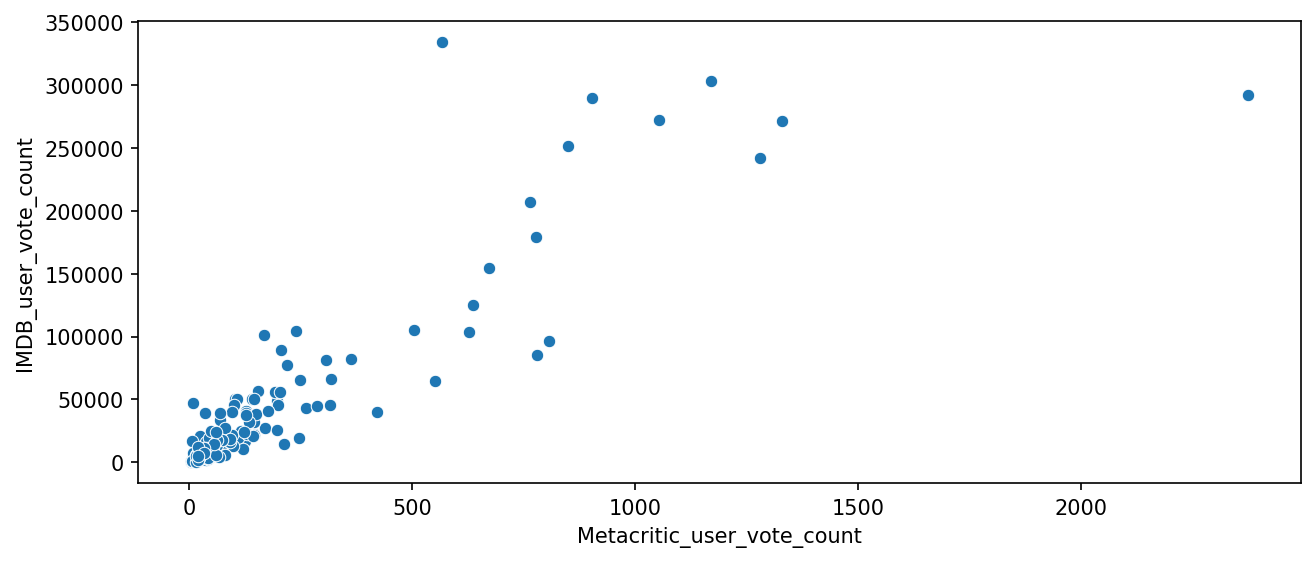

In [97]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

What movie has the highest IMDB user vote count?

In [99]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [100]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

- Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.

In [101]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [104]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

- Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.

Keep in mind, a simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In [106]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [108]:
import numpy as np

df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes']/20,1)

In [110]:
df['Meta_Norm'] = np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2, 1)


In [111]:
df['IMDB_Norm'] = np.round(df['IMDB']/2, 1)

In [112]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,1.2,1.2,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,3.6,3.6,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,3.6,3.6,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.0,4.0,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.9,4.9,4.7,4.4,4.3


Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.

In [113]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', '_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [116]:
norm_scores = df[['STARS', 'RATING','RT_Norm', '_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,1.2,1.2,2.3,1.6,2.1
1,4.5,4.5,3.6,3.6,3.6,3.0,3.5,3.6
2,5.0,4.8,3.6,3.6,3.6,3.6,3.3,3.7
3,5.0,4.8,4.0,4.0,4.0,3.4,3.4,3.7
4,4.5,4.5,4.9,4.9,4.9,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


Creating a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.


C:\Users\Noel\AppData\Local\Temp\ipykernel_21404\4128122401.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores, clip=[0,5], shade = True)


<Axes: ylabel='Density'>

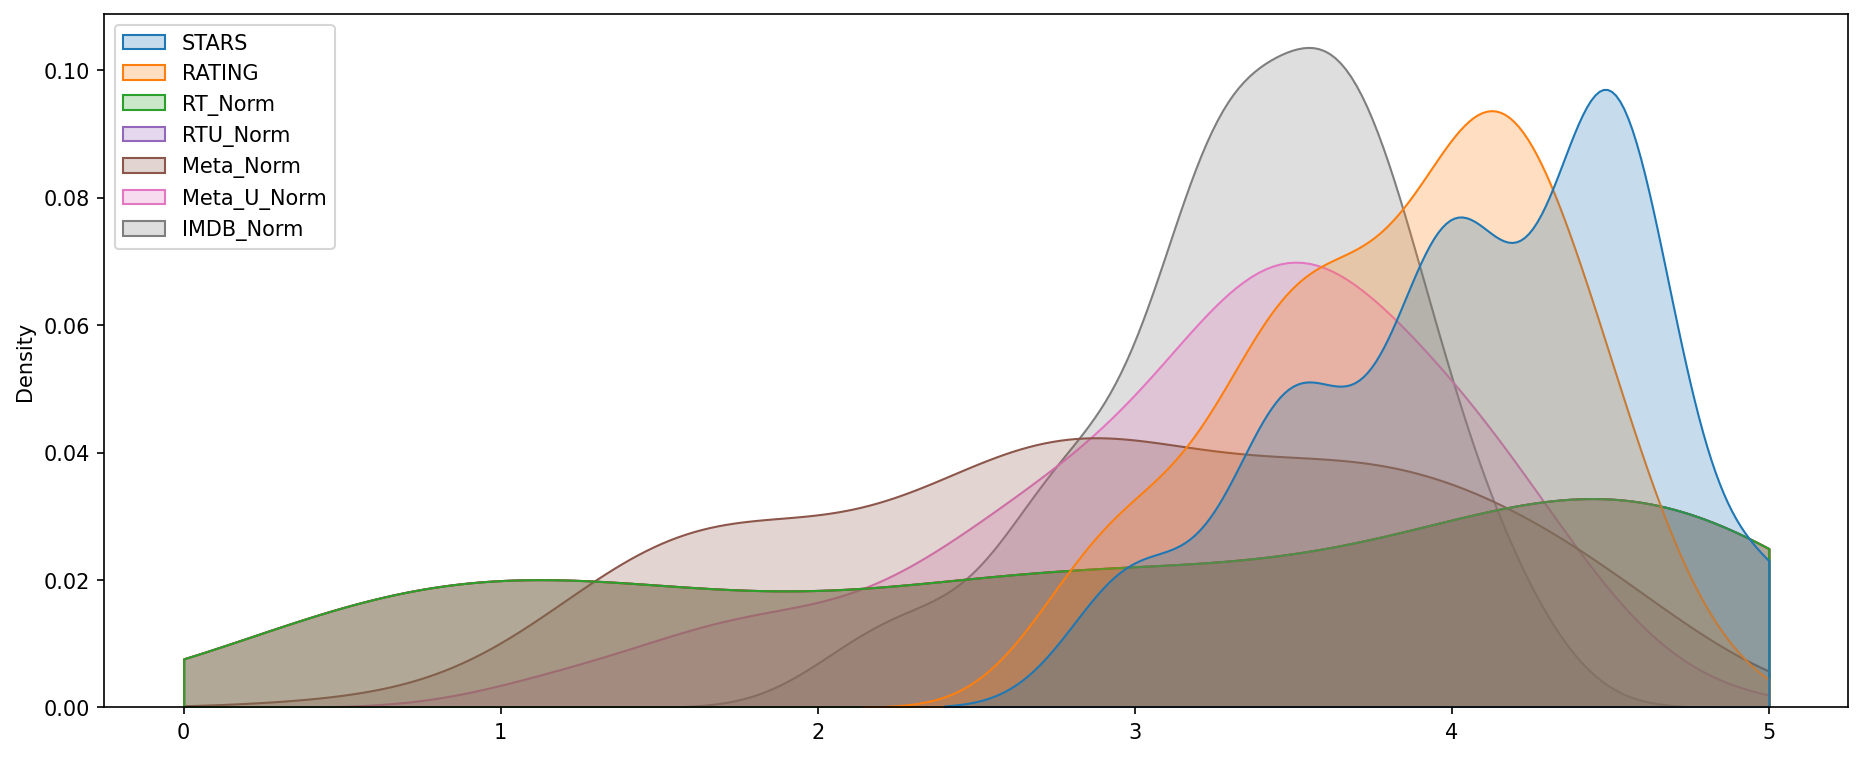

In [127]:
plt.figure(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores, clip=[0,5], shade = True)

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

 Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

C:\Users\Noel\AppData\Local\Temp\ipykernel_21404\924140577.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores[['RT_Norm','STARS']], clip=[0,5],shade=True)


<Axes: ylabel='Density'>

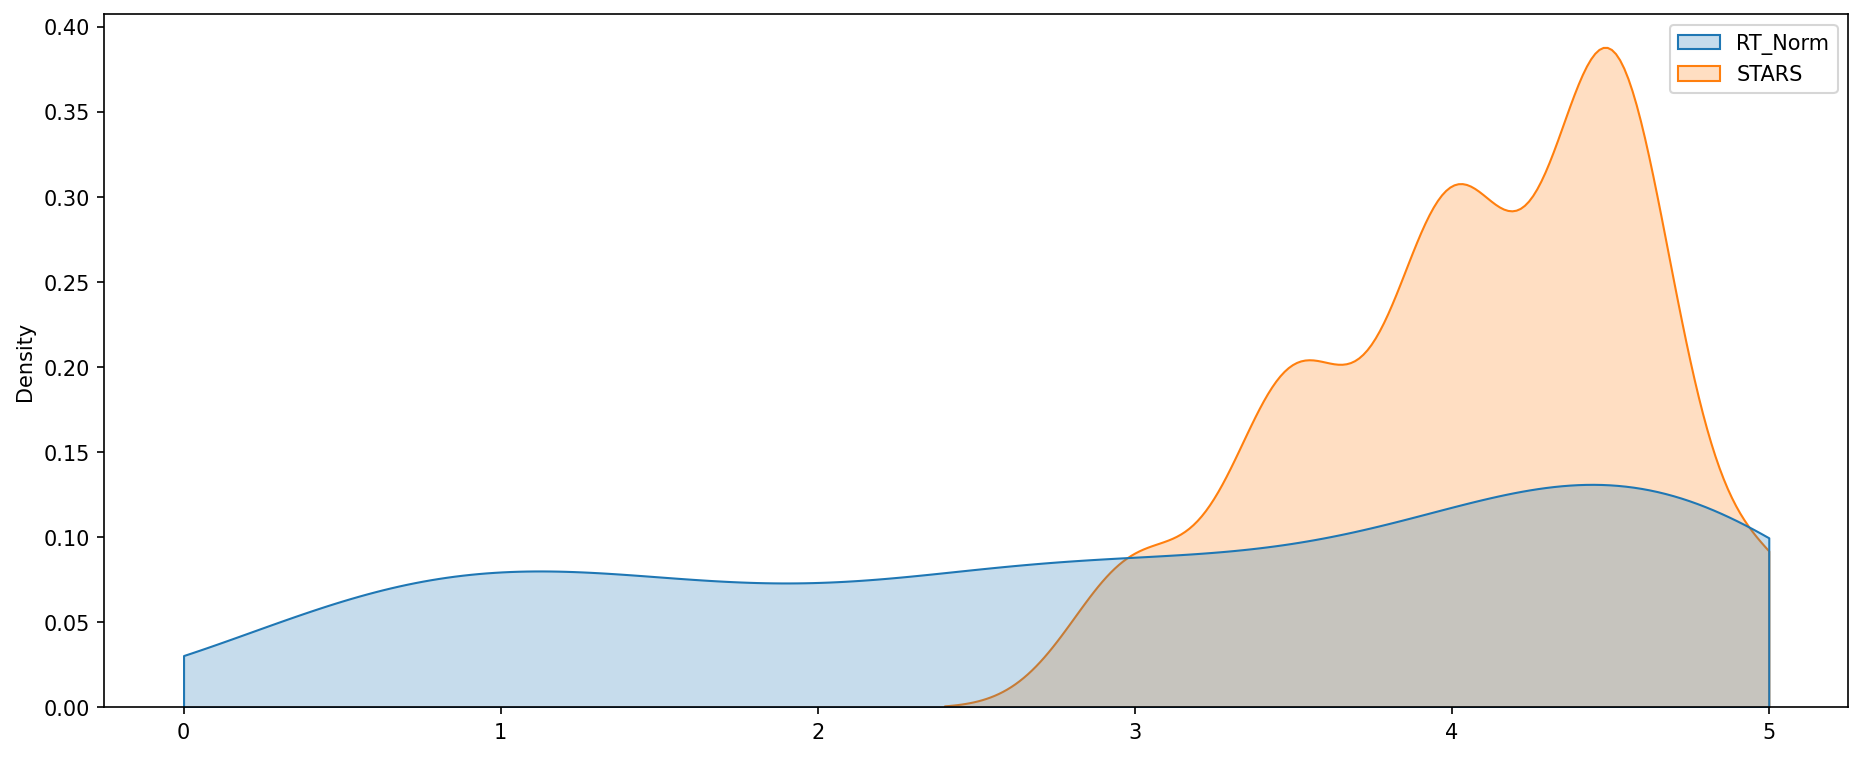

In [129]:
plt.figure(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']], clip=[0,5],shade=True)

<Axes: ylabel='Count'>

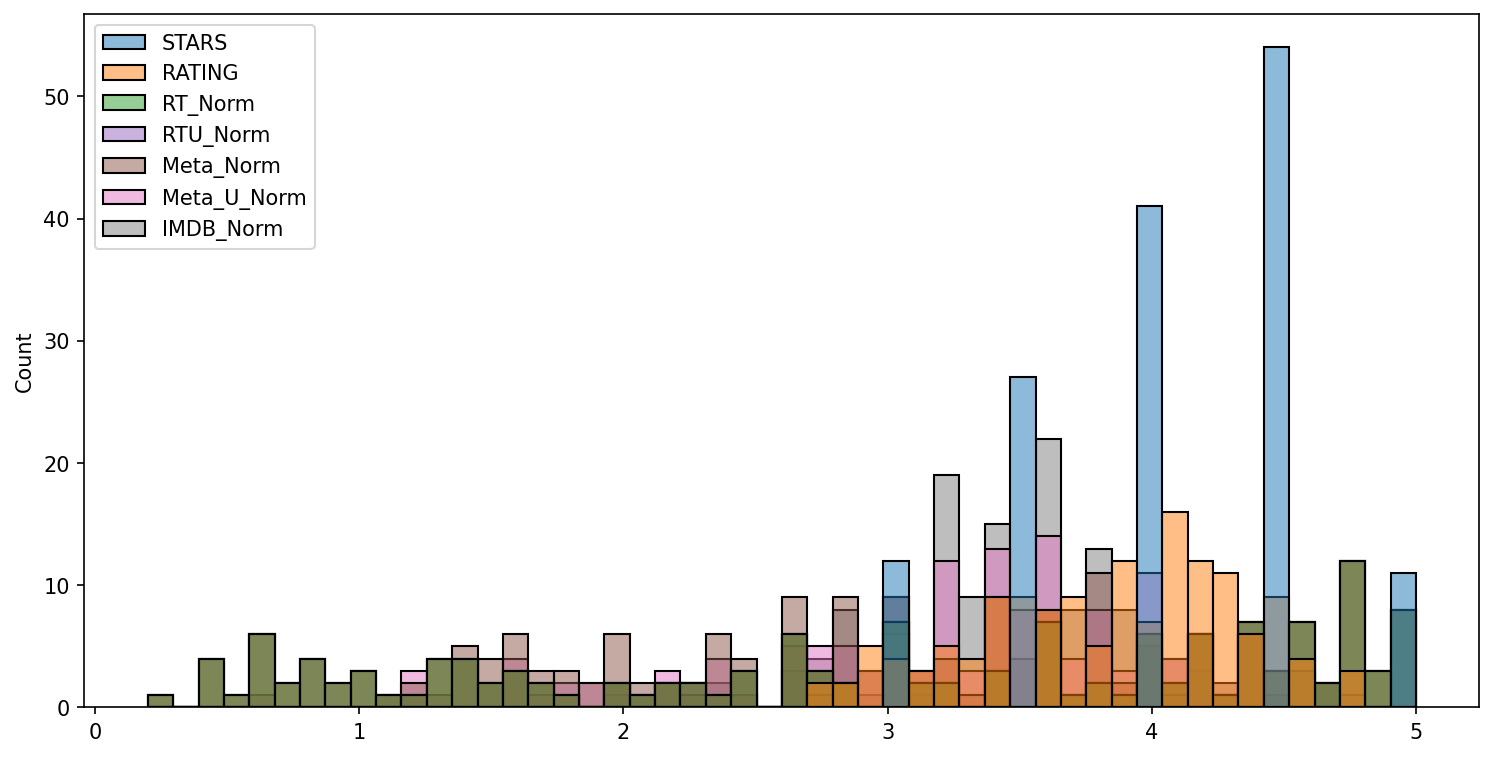

In [131]:
#Can also create a histogram plot 
plt.figure(figsize=(12,6), dpi=150)
sns.histplot(norm_scores, bins=50)


### How are the worst movies rated across all platforms?

Creating a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.

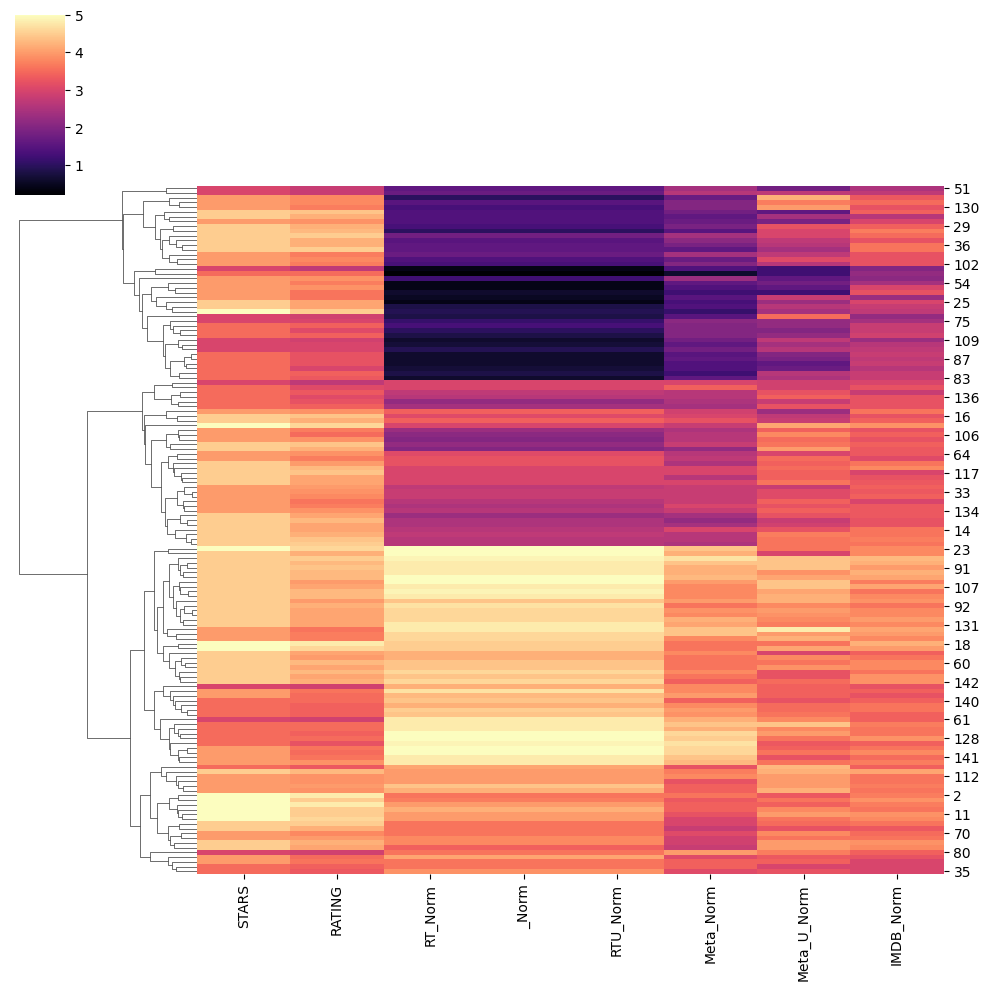

In [133]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.

In [134]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', '_Norm', 'RTU_Norm', 'Meta_Norm',
       'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [136]:
norm_films = df[['FILM', 'STARS', 'RATING', 'RT_Norm', '_Norm', 'RTU_Norm', 'Meta_Norm','Meta_U_Norm', 'IMDB_Norm']]

In [139]:
worst_films = norm_films.nsmallest(10, 'RT_Norm')
worst_films

,FILM,STARS,RATING,RT_Norm,_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,0.2,0.2,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,0.4,0.4,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,0.4,0.4,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,0.4,0.4,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,0.4,0.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,0.5,0.5,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,0.6,0.6,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,0.6,0.6,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,0.6,0.6,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,0.6,0.6,1.6,1.9,2.7


C:\Users\Noel\AppData\Local\Temp\ipykernel_21404\1214111718.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')


Text(0.5, 1.0, "Ratings for RT Critic's 10 Worst Reviewed Films")

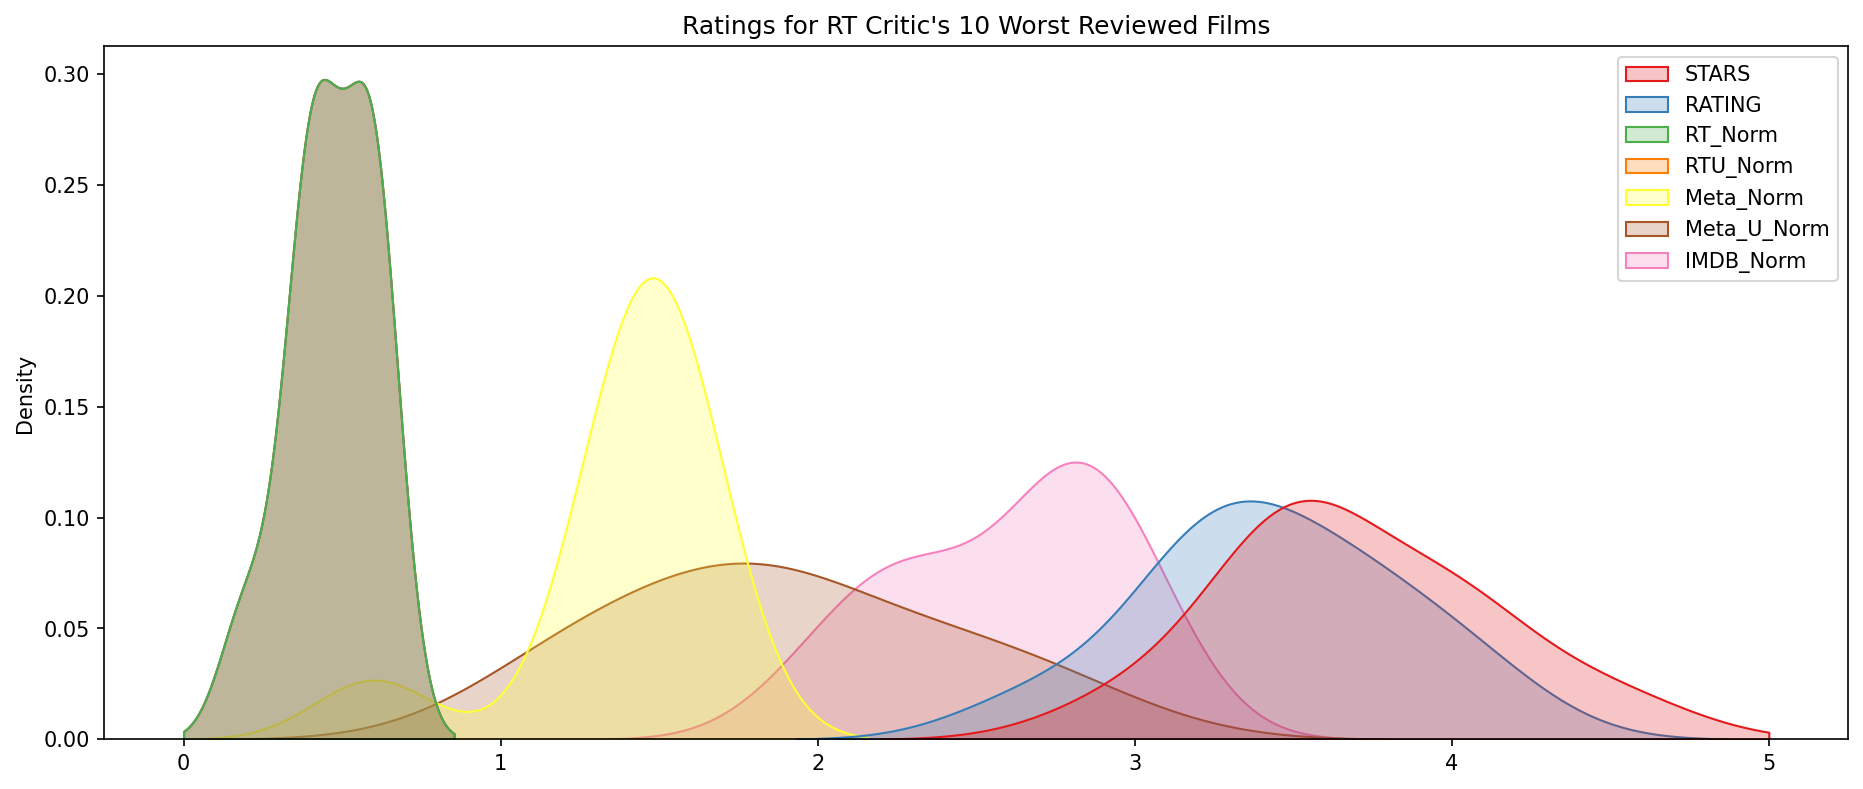

In [142]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films")


---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [144]:
norm_films.iloc[25]

FILM           Taken 3 (2015)
STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
_Norm                     0.4
RTU_Norm                  0.4
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
Name: 25, dtype: object

In [145]:
0.4+2.3+1.3+2.3+3

9.3

In [147]:
9.3/5 # The movie had only 1.86 rating

1.86